In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [194]:
dlvr_df = pd.read_csv("data/deliveries.csv")

dlvr_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [195]:
dlvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [196]:
##checking for missing values

dlvr_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [197]:
batsmen = dlvr_df.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name="runs")

In [198]:
top_batsmen = batsmen.sort_values(by='runs', ascending=False)[:10]
top_batsmen

,batsman,runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632
92,CH Gayle,4560
290,MS Dhoni,4477
384,RV Uthappa,4446
26,AB de Villiers,4428
147,G Gambhir,4223


Text(0.5, 1.0, 'Top 10 Batsmen in IPL')

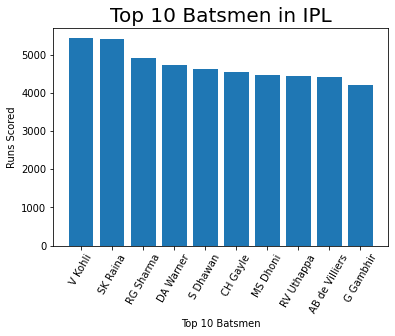

In [199]:
##plotting the batsmen and the runs scored by them
plt.bar(top_batsmen['batsman'], top_batsmen['runs'])
plt.xticks(rotation=60)
plt.xlabel('Top 10 Batsmen',size=10)
plt.ylabel('Runs Scored',size=10)
plt.title('Top 10 Batsmen in IPL',size=20)

In [200]:
innings = dlvr_df.groupby(['match_id', 'batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='inning_runs')
best_ings = innings.sort_values(by='inning_runs', ascending=False)[:10]
best_ings


,match_id,batsman,inning_runs
6200,411,CH Gayle,175
900,60,BB McCullum,158
8426,562,AB de Villiers,133
10149,7935,RR Pant,130
9257,620,AB de Villiers,129
5585,372,CH Gayle,128
3135,206,M Vijay,127
529,36,DA Warner,126
7752,516,V Sehwag,122
10417,7953,SR Watson,121


#### [Home TASK]: find out best innings by batsmen who scored the most runs with least number of balls faced(strike rate)

## Bowlers' Performances

* find out top bowlers - counting most number of wickets
* top bowling performances - by calculating the runs conceded per wicket.

In [201]:
bowlers = dlvr_df[dlvr_df['dismissal_kind'] != 'run out']
bowlers = dlvr_df.groupby('bowler').apply(lambda x: x['dismissal_kind'].dropna().reset_index(name='wickets'))
bowlers

index wickets
bowler                            
A Ashish Reddy 0     80497  bowled
               1     80502  caught
               2     81750  caught
               3     82253  caught
               4     83084  caught
...                    ...     ...
Z Khan         114  142480  caught
               115  143476  bowled
               116  144752  caught
               117  147288  caught
               118  149389  caught

[8834 rows x 2 columns]

In [202]:
bowlers_df = bowlers.groupby('bowler').count().reset_index()
top_bowlers = bowlers_df.sort_values(by='wickets', ascending=False)[:10]

In [203]:
top_bowlers

,bowler,index,wickets
294,SL Malinga,188,188
84,DJ Bravo,168,168
6,A Mishra,165,165
113,Harbhajan Singh,161,161
231,PP Chawla,156,156
48,B Kumar,141,141
236,R Ashwin,138,138
300,SP Narine,137,137
330,UT Yadav,136,136
247,R Vinay Kumar,127,127


In [204]:
bowling_ings = dlvr_df.groupby(['match_id', 'bowler']).apply(lambda x: x['dismissal_kind'].dropna()).reset_index(name='wickets')
ings_wkts_count = bowling_ings.groupby(['match_id', 'bowler']).count().reset_index()
top_bowlers = ings_wkts_count.sort_values(by='wickets', ascending=False)[:10]
top_bowlers


,match_id,bowler,level_2,wickets
4344,616,A Zampa,6,6
4294,608,AD Russell,6,6
3121,440,DJG Sammy,6,6
609,83,Sohail Tanvir,6,6
5057,11310,A Joseph,6,6
4777,7932,TG Southee,5,5
2529,357,SP Narine,5,5
846,119,A Kumble,5,5
316,43,JD Unadkat,5,5
657,90,CRD Fernando,5,5


In [205]:
bowling_ings_runs = dlvr_df.groupby(['match_id', 'bowler']).apply(lambda x: x['total_runs'].sum()).reset_index(name='runs_conceded')
top_performances = pd.merge(top_bowlers, bowling_ings_runs, left_on=['match_id', 'bowler'], right_on=['match_id', 'bowler'])
top_performances['runs_per_wicket'] = top_performances['runs_conceded'] / top_performances['wickets']
top_performances

,match_id,bowler,level_2,wickets,runs_conceded,runs_per_wicket
0,616,A Zampa,6,6,19,3.166667
1,608,AD Russell,6,6,25,4.166667
2,440,DJG Sammy,6,6,23,3.833333
3,83,Sohail Tanvir,6,6,15,2.500000
4,11310,A Joseph,6,6,18,3.000000
5,7932,TG Southee,5,5,33,6.600000
6,357,SP Narine,5,5,23,4.600000
7,119,A Kumble,5,5,6,1.200000
8,43,JD Unadkat,5,5,30,6.000000
9,90,CRD Fernando,5,5,18,3.600000


In [206]:
match_bowling_grp = dlvr_df.groupby(['match_id', 'inning', 'bowling_team', 'bowler', 'over'])
bowler_runs = match_bowling_grp['total_runs', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs'].sum().reset_index()

bowler_runs['extras'] = bowler_runs['wide_runs'] + bowler_runs['noball_runs']
bowler_runs['runs'] = bowler_runs['total_runs'] - bowler_runs['bye_runs'] + bowler_runs['legbye_runs']


bowler_runs = bowler_runs.drop(['bye_runs', 'legbye_runs', 'total_runs'], axis=1)


In [207]:
bowler_runs

,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,extras,runs
0,1,1,Royal Challengers Bangalore,A Choudhary,2,0,1,1,16
1,1,1,Royal Challengers Bangalore,A Choudhary,10,0,0,0,4
2,1,1,Royal Challengers Bangalore,A Choudhary,13,1,0,1,18
3,1,1,Royal Challengers Bangalore,A Choudhary,18,2,0,2,17
4,1,1,Royal Challengers Bangalore,S Aravind,5,0,0,0,9
...,...,...,...,...,...,...,...,...,...
29052,11415,2,Mumbai Indians,RD Chahar,14,0,0,0,3
29053,11415,2,Mumbai Indians,SL Malinga,3,0,0,0,7
29054,11415,2,Mumbai Indians,SL Malinga,6,1,0,1,16
29055,11415,2,Mumbai Indians,SL Malinga,16,0,0,0,20


In [208]:
bowler_runs.groupby(['match_id', 'bowler', 'bowling_team'])['runs'].sum().reset_index()

,match_id,bowler,bowling_team,runs
0,1,A Choudhary,Royal Challengers Bangalore,55
1,1,A Nehra,Sunrisers Hyderabad,42
2,1,B Kumar,Sunrisers Hyderabad,29
3,1,BCJ Cutting,Sunrisers Hyderabad,35
4,1,Bipul Sharma,Sunrisers Hyderabad,4
...,...,...,...,...
8972,11415,MJ McClenaghan,Mumbai Indians,26
8973,11415,RA Jadeja,Chennai Super Kings,12
8974,11415,RD Chahar,Mumbai Indians,14
8975,11415,SL Malinga,Mumbai Indians,50


In [209]:
bowler_runs.groupby(['match_id', 'bowler', 'bowling_team'])['over'].count().reset_index()

,match_id,bowler,bowling_team,over
0,1,A Choudhary,Royal Challengers Bangalore,4
1,1,A Nehra,Sunrisers Hyderabad,4
2,1,B Kumar,Sunrisers Hyderabad,4
3,1,BCJ Cutting,Sunrisers Hyderabad,4
4,1,Bipul Sharma,Sunrisers Hyderabad,1
...,...,...,...,...
8972,11415,MJ McClenaghan,Mumbai Indians,4
8973,11415,RA Jadeja,Chennai Super Kings,2
8974,11415,RD Chahar,Mumbai Indians,4
8975,11415,SL Malinga,Mumbai Indians,4


In [210]:
bowler_runs

,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,extras,runs
0,1,1,Royal Challengers Bangalore,A Choudhary,2,0,1,1,16
1,1,1,Royal Challengers Bangalore,A Choudhary,10,0,0,0,4
2,1,1,Royal Challengers Bangalore,A Choudhary,13,1,0,1,18
3,1,1,Royal Challengers Bangalore,A Choudhary,18,2,0,2,17
4,1,1,Royal Challengers Bangalore,S Aravind,5,0,0,0,9
...,...,...,...,...,...,...,...,...,...
29052,11415,2,Mumbai Indians,RD Chahar,14,0,0,0,3
29053,11415,2,Mumbai Indians,SL Malinga,3,0,0,0,7
29054,11415,2,Mumbai Indians,SL Malinga,6,1,0,1,16
29055,11415,2,Mumbai Indians,SL Malinga,16,0,0,0,20


## Predicting the Score of a Team

In [211]:
batsman_grp = dlvr_df.groupby(['match_id', 'inning', 'batting_team', 'batsman'])
batsmen = batsman_grp['batsman_runs'].sum().reset_index()
batsmen


,match_id,inning,batting_team,batsman,batsman_runs
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16
1,1,1,Sunrisers Hyderabad,DA Warner,14
2,1,1,Sunrisers Hyderabad,DJ Hooda,16
3,1,1,Sunrisers Hyderabad,MC Henriques,52
4,1,1,Sunrisers Hyderabad,S Dhawan,40
...,...,...,...,...,...
11330,11415,2,Chennai Super Kings,MS Dhoni,2
11331,11415,2,Chennai Super Kings,RA Jadeja,9
11332,11415,2,Chennai Super Kings,SK Raina,9
11333,11415,2,Chennai Super Kings,SN Thakur,2


In [212]:
## ignoring the wide balls.
balls_faced = dlvr_df[dlvr_df["wide_runs"] == 0]
balls_faced = balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns = ["match_id", "inning", "batsman", "balls_faced"]
batsmen = batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"],
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0
1,1,1,Sunrisers Hyderabad,DA Warner,14,8.0
2,1,1,Sunrisers Hyderabad,DJ Hooda,16,12.0
3,1,1,Sunrisers Hyderabad,MC Henriques,52,37.0
4,1,1,Sunrisers Hyderabad,S Dhawan,40,31.0
...,...,...,...,...,...,...
11330,11415,2,Chennai Super Kings,MS Dhoni,2,8.0
11331,11415,2,Chennai Super Kings,RA Jadeja,9,5.0
11332,11415,2,Chennai Super Kings,SK Raina,9,14.0
11333,11415,2,Chennai Super Kings,SN Thakur,2,2.0


In [213]:
##fours and sixes
fours = dlvr_df[ dlvr_df["batsman_runs"] == 4]
sixes = dlvr_df[ dlvr_df["batsman_runs"] == 6]

fours_by_batsman = fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_by_batsman = sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()


In [214]:
fours_by_batsman

,match_id,inning,batsman,batsman_runs
0,1,1,DA Warner,2
1,1,1,MC Henriques,3
2,1,1,S Dhawan,5
3,1,1,Yuvraj Singh,7
4,1,2,CH Gayle,2
...,...,...,...,...
6922,11415,1,KA Pollard,3
6923,11415,1,RG Sharma,1
6924,11415,2,F du Plessis,3
6925,11415,2,RA Jadeja,1


In [215]:
fours_by_batsman.columns = ["match_id", "inning", "batsman", "4s"]
sixes_by_batsman.columns = ["match_id", "inning", "batsman", "6s"]

In [216]:
batsmen = batsmen.merge(fours_by_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen = batsmen.merge(sixes_by_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen['SR'] = np.round(batsmen['batsman_runs'] / batsmen['balls_faced'] * 100, 2)


In [217]:
batsmen

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0,NaN,2.0,266.67
1,1,1,Sunrisers Hyderabad,DA Warner,14,8.0,2.0,1.0,175.00
2,1,1,Sunrisers Hyderabad,DJ Hooda,16,12.0,NaN,1.0,133.33
3,1,1,Sunrisers Hyderabad,MC Henriques,52,37.0,3.0,2.0,140.54
4,1,1,Sunrisers Hyderabad,S Dhawan,40,31.0,5.0,NaN,129.03
...,...,...,...,...,...,...,...,...,...
11330,11415,2,Chennai Super Kings,MS Dhoni,2,8.0,NaN,NaN,25.00
11331,11415,2,Chennai Super Kings,RA Jadeja,9,5.0,1.0,NaN,180.00
11332,11415,2,Chennai Super Kings,SK Raina,9,14.0,NaN,NaN,64.29
11333,11415,2,Chennai Super Kings,SN Thakur,2,2.0,NaN,NaN,100.00


In [218]:
na_cols = ["batsman_runs", "4s", "6s", "SR"]
for col in na_cols:
    batsmen[col] = batsmen[col].fillna(0)

In [219]:
batsmen

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0,0.0,2.0,266.67
1,1,1,Sunrisers Hyderabad,DA Warner,14,8.0,2.0,1.0,175.00
2,1,1,Sunrisers Hyderabad,DJ Hooda,16,12.0,0.0,1.0,133.33
3,1,1,Sunrisers Hyderabad,MC Henriques,52,37.0,3.0,2.0,140.54
4,1,1,Sunrisers Hyderabad,S Dhawan,40,31.0,5.0,0.0,129.03
...,...,...,...,...,...,...,...,...,...
11330,11415,2,Chennai Super Kings,MS Dhoni,2,8.0,0.0,0.0,25.00
11331,11415,2,Chennai Super Kings,RA Jadeja,9,5.0,1.0,0.0,180.00
11332,11415,2,Chennai Super Kings,SK Raina,9,14.0,0.0,0.0,64.29
11333,11415,2,Chennai Super Kings,SN Thakur,2,2.0,0.0,0.0,100.00


In [234]:
team_score = batsmen[batsmen['batting_team'] == "Mumbai Indians"].reset_index()
team_score

,index,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR
0,17,2,1,Mumbai Indians,AT Rayudu,10,12.0,0.0,0.0,83.33
1,18,2,1,Mumbai Indians,HH Pandya,35,15.0,1.0,4.0,233.33
2,19,2,1,Mumbai Indians,JC Buttler,38,19.0,3.0,3.0,200.00
3,20,2,1,Mumbai Indians,KA Pollard,27,17.0,3.0,1.0,158.82
4,21,2,1,Mumbai Indians,KH Pandya,3,5.0,0.0,0.0,60.00
...,...,...,...,...,...,...,...,...,...,...
1411,11322,11415,1,Mumbai Indians,KH Pandya,7,7.0,0.0,0.0,100.00
1412,11323,11415,1,Mumbai Indians,MJ McClenaghan,0,2.0,0.0,0.0,0.00
1413,11324,11415,1,Mumbai Indians,Q de Kock,30,17.0,0.0,4.0,176.47
1414,11325,11415,1,Mumbai Indians,RD Chahar,0,2.0,0.0,0.0,0.00


In [235]:
scores = team_score.groupby(['match_id'])['batsman_runs'].sum().reset_index()
score

In [245]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['batsman']
encoder = LabelEncoder()
for ftr in ftr_list:
    team_score[ftr] = encoder.fit_transform(team_score[ftr])
    print(encoder.classes_)

team_score

['A Dananjaya' 'A Joseph' 'A Nehra' 'A Symonds' 'AC Blizzard' 'AG Murtaza'
 'AJ Finch' 'AM Nayar' 'AM Rahane' 'AN Ahmed' 'AP Tare' 'AS Yadav'
 'AT Rayudu' 'BB Sran' 'BCJ Cutting' 'BR Dunk' 'C Madan' 'C Nanda'
 'CJ Anderson' 'CJ McKay' 'CM Gautam' 'CRD Fernando' 'DJ Bravo'
 'DJ Jacobs' 'DJ Thornely' 'DR Smith' 'DS Kulkarni' 'E Lewis' 'GJ Maxwell'
 'GR Napier' 'HH Gibbs' 'HH Pandya' 'Harbhajan Singh' 'Ishan Kishan'
 'J Suchith' 'JC Buttler' 'JEC Franklin' 'JJ Bumrah' 'JP Duminy'
 'KA Pollard' 'KD Karthik' 'KH Pandya' 'KV Sharma' 'L Ronchi'
 'LMP Simmons' 'M Markande' 'M de Lange' 'MA Khote' 'MEK Hussey'
 'MG Johnson' 'MJ Guptill' 'MJ McClenaghan' 'MK Pandey' 'MM Patel'
 'Mohammad Ashraful' 'Mustafizur Rahman' 'N Rana' 'NLTC Perera'
 'NM Coulter-Nile' 'P Kumar' 'PA Patel' 'PJ Sangwan' 'PP Ojha' 'PR Shah'
 'Q de Kock' 'R Dhawan' 'R McLaren' 'R Salam' 'R Sathish' 'R Vinay Kumar'
 'RD Chahar' 'RE Levi' 'RG Sharma' 'RJ Peterson' 'RP Singh' 'RR Raje'
 'RT Ponting' 'RV Uthappa' 'S Dhawan' 'S Go

,index,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR
0,17,2,1,Mumbai Indians,12,10,12.0,0.0,0.0,83.33
1,18,2,1,Mumbai Indians,31,35,15.0,1.0,4.0,233.33
2,19,2,1,Mumbai Indians,35,38,19.0,3.0,3.0,200.00
3,20,2,1,Mumbai Indians,39,27,17.0,3.0,1.0,158.82
4,21,2,1,Mumbai Indians,41,3,5.0,0.0,0.0,60.00
...,...,...,...,...,...,...,...,...,...,...
1411,11322,11415,1,Mumbai Indians,41,7,7.0,0.0,0.0,100.00
1412,11323,11415,1,Mumbai Indians,51,0,2.0,0.0,0.0,0.00
1413,11324,11415,1,Mumbai Indians,64,30,17.0,0.0,4.0,176.47
1414,11325,11415,1,Mumbai Indians,70,0,2.0,0.0,0.0,0.00


In [247]:
team_score = team_score.drop(['index', 'match_id', 'inning', 'batting_team'], axis=1)

In [259]:
team_score = team_score.dropna()

In [260]:
team_score.dropna()

,batsman,batsman_runs,balls_faced,4s,6s,SR
0,12,10,12.0,0.0,0.0,83.33
1,31,35,15.0,1.0,4.0,233.33
2,35,38,19.0,3.0,3.0,200.00
3,39,27,17.0,3.0,1.0,158.82
4,41,3,5.0,0.0,0.0,60.00
...,...,...,...,...,...,...
1411,41,7,7.0,0.0,0.0,100.00
1412,51,0,2.0,0.0,0.0,0.00
1413,64,30,17.0,0.0,4.0,176.47
1414,70,0,2.0,0.0,0.0,0.00


In [261]:
team_score.isnull().sum()

batsman         0
batsman_runs    0
balls_faced     0
4s              0
6s              0
SR              0
dtype: int64

## Regression to predict Batsmen Scores

In [262]:
from sklearn.metrics import mean_squared_error

# RMSE for testing data

def rmse_model(model, x_test, y_test):
    predictions = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(predictions, y_test))
    return(rmse)

In [263]:
from sklearn.model_selection import train_test_split

x = team_score[['batsman', 'balls_faced', '4s', '6s', 'SR']]
y = team_score[['batsman_runs']]

x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.2, random_state=1)

In [264]:
print(f'Original data: {x.shape}')
print(f'Training data: {x_train.shape}')
print(f'Testing data: {x_test.shape}')
print(f'Va;lidation data: {x_val.shape}')

Original data: (1415, 5)
Training data: (905, 5)
Testing data: (283, 5)
Va;lidation data: (227, 5)


In [270]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print(f'RMSE Score: {rmse_model(model, x_test, y_test)}')
print(f'Model Coefficients: {model.coef_}')
print(f'Intercept Values of the Model: {model.intercept_}')

RMSE Score: 2.7023965551405595
Model Coefficients: [[-4.77938532e-03  7.37868708e-01  2.85919108e+00  4.90604858e+00
   2.11352142e-02]]
Intercept Values of the Model: [-2.57274002]


In [278]:
sample = {'batsman': [94], 'balls_faced': [10], '4s': [2], '6s': [1], 'SR': [150]}
sample_df = pd.DataFrame(sample)
sample_df

,batsman,balls_faced,4s,6s,SR
0,94,10,2,1,150


In [279]:
model.predict(sample_df)

array([[18.15139771]])